In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import arviz as az
import matplotlib.pyplot as plt

/Users/son520804/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


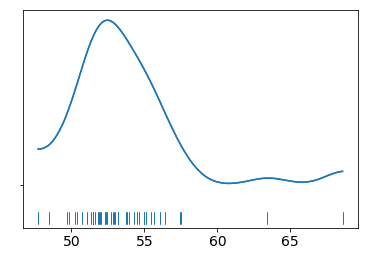

In [4]:
data = np.loadtxt('chemical_shifts.csv')
az.plot_kde(data, rug=True)
plt.yticks([0], alpha=0)
plt.show()

In [5]:
with pm.Model() as model_g:
    mu = pm.Uniform('mu', lower=40, upper=70)
    sigma = pm.HalfNormal('sigma', sd=10)
    y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
    trace_g = pm.sample(1000)
az.plot_trace(trace_g)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:02<00:00, 1427.63draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24677a90>,
      dtype=object)

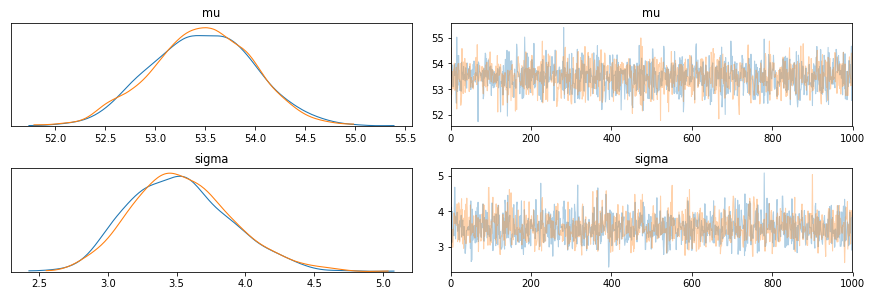

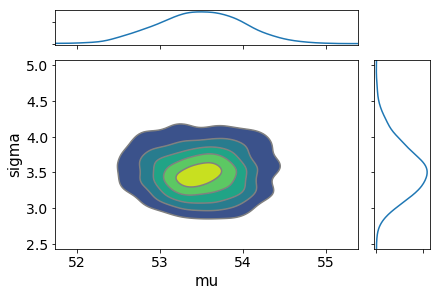

In [6]:
az.plot_joint(trace_g, kind='kde', fill_last=False)
plt.show()

In [7]:
az.summary(trace_g)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,53.472,0.510,52.524,54.402,0.012,0.008,1873.0,1873.0,1869.0,1446.0,1.0
sigma,3.535,0.362,2.892,4.222,0.009,0.006,1722.0,1717.0,1711.0,1500.0,1.0


In [8]:
y_pred_g = pm.sample_posterior_predictive(trace_g, 100, model_g)

/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 100/100 [00:00<00:00, 116.69it/s]


arviz.data.io_pymc3 - WARNING - posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


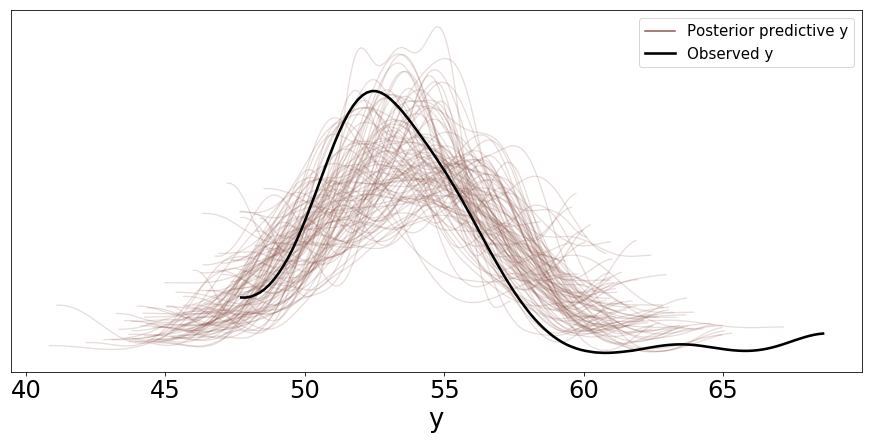

In [9]:
data_ppc = az.from_pymc3(trace=trace_g, posterior_predictive=y_pred_g)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=False)
ax[0].legend(fontsize=15)
plt.show()